In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('Improved3SDOS.csv')

In [3]:
df.shape

(1100, 29)

In [4]:
df.head()

,Unnamed: 0,Unnamed: 0.1,Age,Gender,Home Language,Father Occupation,Mother Occupation,Number Of Siblings,Father Education,Mother Education,...,Bangla,English,Math,Science,History,Social Science,Religious Study,Family Annual income,Extra Tution,Hours of study per day
0,0,0,10-13 years,female,Bangla,Private sector,Home maker,Four or more,Honors/ Equivalent,primary,...,60,75,70,38,86,36,77,350000,Yes,3 hours
1,1,1,13-15 years,female,Bangla,Unemployed,Home maker,Four or more,secondary,None,...,74,68,83,84,24,63,82,200000,Yes,3 hours
2,2,2,10-13 years,female,Bangla,Business,Worker,None,primary,Honors/Equivalent,...,84,29,86,23,85,58,52,400000,Yes,2 hours
3,3,3,10-13 years,male,Bangla,Private sector,Home maker,Four or more,Honors/ Equivalent,Honors/Equivalent,...,65,81,32,53,20,56,50,200000,Yes,2 hours
4,4,4,13-15 years,female,Bangla,Immigrant,Agriculture,Two Children,secondary,secondary,...,58,75,69,59,51,46,21,300000,Yes,2 hours


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              1100 non-null   int64  
 1   Unnamed: 0.1            1100 non-null   int64  
 2   Age                     1100 non-null   object 
 3   Gender                  1100 non-null   object 
 4   Home Language           1100 non-null   object 
 5   Father Occupation       1100 non-null   object 
 6   Mother Occupation       1100 non-null   object 
 7   Number Of Siblings      1100 non-null   object 
 8   Father Education        1100 non-null   object 
 9   Mother Education        1100 non-null   object 
 10  School Distance         1100 non-null   object 
 11  Means to school         1100 non-null   object 
 12  House Lighting          1100 non-null   object 
 13  School Infrustructure   1100 non-null   object 
 14  School Meal per day     1100 non-null   

In [6]:
df.drop(['Unnamed: 0','Unnamed: 0.1'],axis=1,inplace=True)

In [7]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [8]:

for col in df.columns:
    if df[col].dtype==np.number:
        continue
    else:
        df[col]=le.fit_transform(df[col])

In [9]:
df.head()

,Age,Gender,Home Language,Father Occupation,Mother Occupation,Number Of Siblings,Father Education,Mother Education,School Distance,Means to school,...,Bangla,English,Math,Science,History,Social Science,Religious Study,Family Annual income,Extra Tution,Hours of study per day
0,0,0,0,4,3,0,0,3,1,4,...,40,55,50,18,66,16,57,6,1,3
1,1,0,0,6,3,0,4,2,2,1,...,54,48,63,64,4,43,62,3,1,3
2,0,0,0,1,7,1,3,0,0,0,...,64,9,66,3,65,38,32,7,1,2
3,0,1,0,4,3,0,0,0,1,3,...,45,61,12,33,0,36,30,3,1,2
4,1,0,0,3,0,3,4,4,2,4,...,38,55,49,39,31,26,1,5,1,2


In [10]:
x=df.drop('Class Label',axis=1)
y=df['Class Label']

In [11]:

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.2,random_state=45)

,Age,Gender,Home Language,Father Occupation,Mother Occupation,Number Of Siblings,Father Education,Mother Education,School Distance,Means to school,...,Bangla,English,Math,Science,History,Social Science,Religious Study,Family Annual income,Extra Tution,Hours of study per day
1013,2,1,0,5,7,3,3,4,6,4,...,40,55,8,3,40,48,46,16,1,2
702,0,0,0,7,3,1,3,2,1,2,...,37,26,42,25,43,67,2,5,1,2
774,1,1,0,1,3,3,4,4,3,1,...,29,45,14,60,13,15,8,1,0,1
5,0,0,0,7,3,2,4,2,3,2,...,50,41,29,1,5,40,42,3,1,1
745,1,1,0,3,2,0,3,2,1,0,...,42,15,57,46,28,4,15,5,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
944,0,0,1,3,3,0,3,0,2,4,...,4,66,71,24,12,48,47,14,1,2
355,0,0,0,3,3,2,2,0,1,3,...,47,23,20,60,45,3,40,17,1,2
547,2,0,0,7,3,2,3,4,3,1,...,29,46,29,1,64,61,63,11,1,3
497,1,0,0,2,3,2,4,2,4,3,...,70,65,67,36,2,10,20,16,1,2


In [12]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=1000)


In [13]:
rfc.fit(xtrain,ytrain)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [14]:
rfc.score(xtest,ytest)

0.9181818181818182

In [15]:
rfc.feature_importances_

array([0.00483191, 0.00319212, 0.00852257, 0.00893529, 0.00732657,
       0.00667451, 0.00669097, 0.0057355 , 0.0082024 , 0.00608021,
       0.00497824, 0.00493113, 0.0026752 , 0.00419434, 0.4396688 ,
       0.00607305, 0.02409398, 0.02308979, 0.02197039, 0.03443259,
       0.02855557, 0.02986353, 0.03344366, 0.05892455, 0.03413658,
       0.18277655])

In [16]:
pred=rfc.predict(xtest)

In [17]:
from sklearn.metrics import confusion_matrix
confusion_matrix(ytest,pred)

array([[133,   6],
       [ 12,  69]], dtype=int64)

In [18]:
from sklearn.metrics import classification_report
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       139
           1       0.92      0.85      0.88        81

    accuracy                           0.92       220
   macro avg       0.92      0.90      0.91       220
weighted avg       0.92      0.92      0.92       220



# Roc Auc carve

In [22]:
from sklearn.metrics import auc,classification_report,accuracy_score,roc_curve,roc_auc_score

In [23]:
rf_auc=roc_auc_score(ytest,pred)

In [24]:
print(rf_auc)

0.9043431921129763


In [25]:
rf_fpr,rf_tpr,_=roc_curve(ytest,pred)

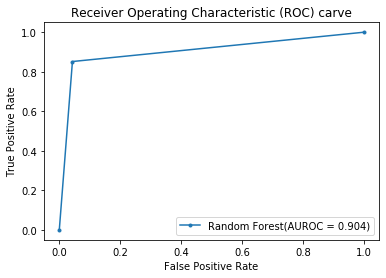

In [29]:
plt.plot(rf_fpr,rf_tpr,marker='.',label='Random Forest(AUROC = %0.3f)'%rf_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) carve')
plt.legend()
plt.show()